# Problem 3 - Weakly and Semi-Supervised Learning for Image Classification

## 3.1

**Answer:**


Weakly supervised and semi-supervised pretraining are both techniques for pretraining deep learning models but they differ in the type of data that they use. More precisely, weakly supervised pretraining uses data that has been labeled with noisy and/or incomplete labels (like hashtags on Instagram images in our example). This data type is not that hard to obtain as it can be pulled from different social media platforms or simple web searches. Due to this, it can often be very noisy, incomplete, and/or incorrect as there was no way to confirm that the targets were labeled correctly. On the other hand, semi-supervised pretraining uses two diffeent types of data - smaller set of high-quality labels and a large set of unlabeled data. Labeled data is much thougher (and more expensive) to obtain but it is much more reliable which can help us correct the mistakes in the unlabeled (or weekly labeled) data. This we show in the Yalniz et al. paper when teacher model was trained on the labeled data and used to create pseudo-lables (less precise lables but help us increase the amount of data for training) for the unlabeled data which was then in additon to labeled data used to train the student model.


Both methods can use the same dataset for training they just apply different apprached in treating the data. The first approach, weekly supervised pretraining approach, uses the noisy labels in the dataset (like Instagram hashtags) to train the model. The model learns to associate the noisy labels with the images, even though the labels may not be entirely accurate. This can help the model to learn general features of the images, which can be useful for downstream tasks. In order to achive the best accuracy possible with loose labels, it applies different techinques to imporve class imablance and potential bias in the model. In semi-supervised pretraining we saw that there is actually 2 separate datasets or parts of it. There is a small dataset with high quality labels and other that is completly void of all labels, as previously mentioned, our first 'teacher' model learnins on the labeled data and makes predictions on labeles for the larger dataset of unlabeled images, after that 'student' model is thought on both the well labeled small dataset and the large dataset labeled using the 'teacher' model. This approach of learning from both well labeled dataset and one labeled by the first 'techer' model can help our student model learn more specific features of the images, which can be useful for downstream tasks that require more precise classification.

While both approaches can achieve high accuray as seen in the papers, generally we would use weakly supervised pretraining for more general feauture learning and classification and semi-supervised pretraining for more specific tasks with more precision.



## 3.2

### 3.2(a)

**Answer:**

In this paper, Mahajan was trying to see how robust models trained on noisy labels from hashtags (from social media platforms) are. He suspected that if given large enough amount of training data the model would be robust to noise. He tested this theory by building model with varying amount of training data and tested it on ImageNet data. In one of the experiments, he tested 2 aspects of hashtag usage for predictions, he used combinations of different number of classes and different number of hashtags and he trained on using weakly labeled Instagram data(as well as images with those hashtags). He trained the model on 1.5k hashtags and 940M images, then 8.5k hashtags and 1B images, 17k hashtags and 1B images and finally 17k hashtags and 3.5B images. Further he tested all of this 4 variations training sizes on 3 different numbers of training classes 1K, 5K and 9K and compared the results to ImageNet performance. The results were somewhat as expected. In the image below (and Figure 1) we can see that for 5000 and 9000 target classes our accuracy of all hashtag models was higher than ImageNet. More precisely for those 2 parts model trained on 1.5k hashtags and 940M images was preforming 1.9 percentage points better than ImageNet and all other models (with more hashtags and images) were performing better than the 5k hashtag one. We can also notice that increasing the number of classes decreases accuracy which was also expected as there is more room for error and less precise testing. However for the case with 1000 classes the result was quite suprising, the accuracy was the higest for the model trained on 1.5k hashtags and 940M images at 84.2% compared to the 83.4% for the model trained on 8.5k hashtags and 1B images and 83.6% for the model trained on 17k hashtags and 1B images. Further, the model trained on 17k hashtags and 3.5B images matches the accuracy of the smallest model at 84.2%. One thing that we can say is that this is significant impovement compared to 79.6% accuracy from ImageNet model. Thus we can say that the models trained on this noisy data demonstrated significant robustness to label noise, achieving 84.2% top-1 accuracy on ImageNet validation when trained on 3.5 billion images. This represented an improvement over models trained on smaller datasets (except for 1.5k hashtags and 940M images), illustrating that the models can indeed be robust against label noise when trained on a sufficiently large scale. In another experiment they tested adding different amounts of noise (10%, 25%, 50%) to the hashtag labels of the training data and compared the results for different number of classes in the target set (ImageNet). The result showed that the performance was only slightly affected by the noise, even when the noise level was as high as 25%. When it reached 50% there was still no (very) significant drop in accuracy - the drop was only 6% for 50% noise level compared to no noise model.

Due to the all previously mentioned information we can conclude that the model using hashtags is robust to noise in the labels, especially if the size of the training dataset and number of hashtags is large. From the second experiment we also learned that adding noise minimally reduces the top-1 accuracy, especially while added noise is less than 25% (accuracy drops by less that 2 percentage points).

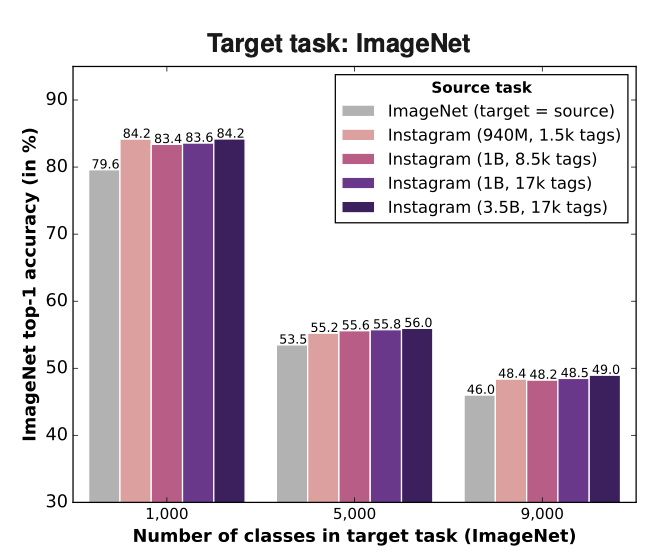

### 3.2(b)

**Answer:**


Dataset class imbalance is always an issue because it can result in badly train model that always predicts the classes that are more present in the dataset rather than based on different characteristics. In problems that use features like hashtags this is often the case as there are some hashtags that are very common like #food #fashion #nyc and others that are very rare #iloveMLnyu #otorhinolaryngology. Further, depending on topics we take hashtags from there could be very little diversity so we need to aim to make it as balanced and diverse as we can. This in turn leads to imbalance that can cause the model to be bias towards the more frequent classes and performs poorly on less frequent ones. To fix this issue, Mahajan (and other authors) implemented a resampling strategy that under-samples (reduces frequency) of more frequent hashtags and over-samples (increases frequency) of rare hashtags during the pretraining phase. This allows us to have ready and balanced dataset for training which helps the model learn more general (un-bias) features rather than those bias towards common tags. Further, this improves the transferability of the learned representations to other tasks and datasets where the class distribution may be different (bias in other way or not bias at all) from that of the pretraining data. He shows the importance of resampling in pretraining in experiments when he shows that it results in improved performance on downstream tasks since it helps the model to generalize better across different domains. Finally, it was also mentioned how resampling can also help improves performace by reducing the impact of noise by having less similar tags and more diverse ones.

To sum up, resampling is crucial to improve balance of the training data so that the model can make un-bias/unskewed predictions on diverse topics, in other words it is crucial for generalization to new data which in turn lets us use our pretrained models on new problems (transfer learning).

## 3.3

### 3.3(a)

**Answer:**

In this paper we learn about two-model architecture made of 'teacher' and 'student' models whose relationship is built using distillation technique. The teacher model is a network trained/taught on a large amount of labeled data and then used to create pseudo-labels for a large set of unlabeled data. After that, the second (separate) model - 'student' is trained on the combination of the labeled data (the ones that techer model was trained on) and new pseudo-labeled data produced by the teacher model. The student model leverages the teacher model by learning to predict the teacher model's outputs for the unlabeled data this allows the student model to learn more details about the deatures as it they also include the uncertainty about the data from the teacher model's output. This is done by training the student model to minimize the difference between its predictions and the teacher model's predictions for the unlabeled data so that it can learned more nuanced features.

This kind of teacher-student model is type of distillation techinque because it includes transfer of knowledge from the bigger teacher model to the smaller (and simpler) student model. This transfer allows the student model to learn on more labeled data (which can be very expensive to collect otherwise) but also since it is learning on the output of teacher model it can also learn on output probabilities and with that enhance its understanding of the features.

### 3.3(b)

**Answer:**

Choosing good values for both K and P is crucial in assigning classes to the unlabeled images using the teacher network. K is the number of top-predicted classes for each unlabled image and P is the number of classes (pseudo-labels) that an unlabeled image can be assigned to

The idea of having P > 1 is to allow the model to place an unlabeled image in multiple categories, for instance if we have an image with 2 animals on it - cat and dog - it can fall in both of those classes. It is especially important to keep P > 1 as a way to collect enough reliable examples for the tail classes (more rare classes) when the collection $U$ (unlabeled data) is not large enough. Additionally, by setting the P > 1 the student model will be able to learn more complex relationships between different categories since there will be more images in each class and this can potentially lead to imporved performance of the model.

### 3.3(c)

**Answer:**

To produce the labeled dataset we pass the unlabeled images through the teacher model that classifies them. For each unlabeled image, the top K predicted classes are obtained with corresponding confidence scores. If these scores for top-predicted classes are larger than a given threshold we assign the unlabeled image to that class and if the score for the top-predicted class is less than the threshold we assign it to multiple - up to P classes. Thus (as previously mentioned), an image in the new dataset can belong to multiple classes up to P of them. This is because unlabeled images are assigned classes based on top K predicted classes, and the student model is able to learn to predict multiple classes for an unlabeled image which is crucial as in real life same image often reflects multiple possible classifications (e.g. cat and a dog on the same image).





### 3.3(d)

**Answer:**

Looking at the Figure 5 we can see (as expected) that the accuracy of the student model impoves as we increase the value of K, however after it peeks it starts gradually decreasing. This is because at first when we are increasing K student model is being able to learn more complex relationships but as the K increases too much it is 'overfitting' in a way that it is learning from the noise / incorrect predictions from the teacher model and thus making incorrect predictions of its own. The optimal value for K will depend on the quality and accuracy of the teacher model and the unlabeled data (and the amount of it). If the teacher model is very accurate and precise and the unlabeled data is relatively clean, then the student model will be able to learn more complex relationships between the different categories by increasing K However, if the teacher model is not as accurate as we would like it or the unlabeled data is noisy, then the student model will start to learn from incorrect predictions from the teacher model when we increase K too much. As always (an as it was done in the paper) we should experiment with different values of K to find the optimal one for our case.




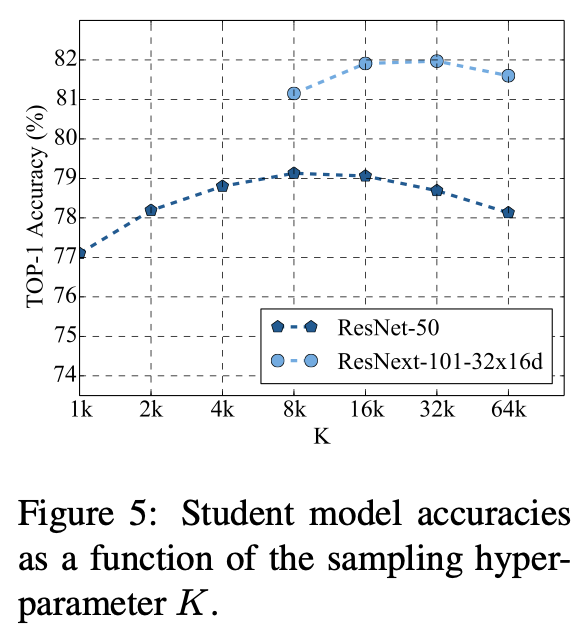